In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
titanic = sns.load_dataset('titanic')

In [69]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [70]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

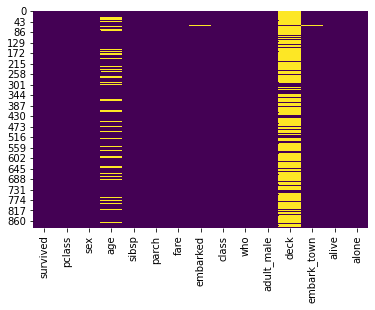

In [71]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [72]:
titanic['age'].isnull().sum()/titanic.shape[0]*100

19.865319865319865

C:\Users\NIKIL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\NIKIL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\NIKIL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\NIKIL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


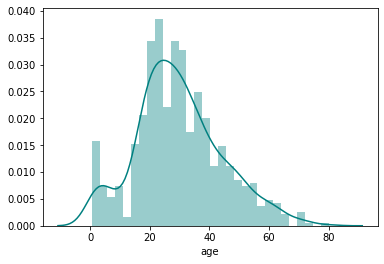

In [73]:
sns.distplot(titanic['age'], bins = 30,color = 'teal')

In [74]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

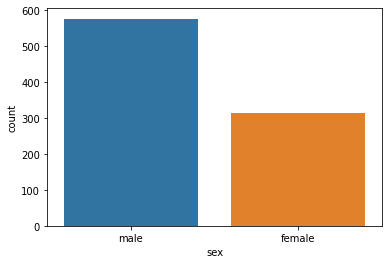

In [75]:
sns.countplot(titanic['sex'])

In [76]:
titanic['embarked'].fillna('S',inplace=True)
titanic['age'].fillna(titanic['age'].mean(),inplace=True)
titanic.drop(labels=['deck','embark_town','alive'],inplace=True,axis=1)

In [77]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

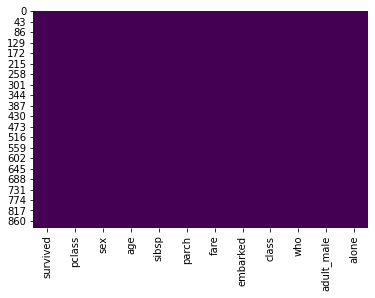

In [78]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [79]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [80]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
titanic['age'] =titanic['age'].astype('int')
titanic['fare']=titanic['fare'].astype('int')
titanic['pclass']=titanic['pclass'].astype('int')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
survived      891 non-null int64
pclass        891 non-null int32
sex           891 non-null object
age           891 non-null int32
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null int32
embarked      891 non-null object
class         891 non-null category
who           891 non-null object
adult_male    891 non-null bool
alone         891 non-null bool
dtypes: bool(2), category(1), int32(3), int64(3), object(3)
memory usage: 55.0+ KB


In [82]:
gender = {'male':1,'female':0}
titanic['sex']=titanic['sex'].map(gender)

In [83]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,1,22,1,0,7,S,Third,man,True,False
1,1,1,0,38,1,0,71,C,First,woman,False,False
2,1,3,0,26,0,0,7,S,Third,woman,False,True
3,1,1,0,35,1,0,53,S,First,woman,False,False
4,0,3,1,35,0,0,8,S,Third,man,True,True


In [84]:
who = {'man':1,'woman':0,'child':2}
titanic['who']=titanic['who'].map(who)

In [85]:
adult_males ={True:1,False:0}
titanic['adult_male'] =titanic['adult_male'].map(adult_males)

In [86]:
alones={True:1,False:0}
titanic['alone']=titanic['alone'].map(alones)

In [87]:
ports ={'S':0,'C':1,'Q':2}
titanic['embarked']=titanic['embarked'].map(ports)

In [88]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,1,22,1,0,7,0,Third,1,1,0
1,1,1,0,38,1,0,71,1,First,0,0,0
2,1,3,0,26,0,0,7,0,Third,0,0,1
3,1,1,0,35,1,0,53,0,First,0,0,0
4,0,3,1,35,0,0,8,0,Third,1,1,1


In [89]:
titanic.drop(labels=['class','who'],axis=1,inplace=True)

In [90]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
adult_male    0
alone         0
dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [92]:
x= titanic.drop('survived',axis = 1)
y= titanic['survived']

In [93]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.33,random_state=42)

In [94]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,3,1,22,1,0,7,0,1,0
1,1,0,38,1,0,71,1,0,0
2,3,0,26,0,0,7,0,0,1
3,1,0,35,1,0,53,0,0,0
4,3,1,35,0,0,8,0,1,1


In [95]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [96]:
X_train.shape

(596, 9)

In [100]:
model = LogisticRegression(solver = 'lbfgs',max_iter=400)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [102]:
accuracy_score(y_test,y_pred)

0.8305084745762712

In [103]:
from sklearn.feature_selection import RFE

In [105]:
model = LogisticRegression(solver='lbfgs',max_iter=500)
rfe = RFE(model,5,verbose=1)
rfe= rfe.fit(x,y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [108]:
rfe.support_

array([ True, False, False,  True,  True, False, False,  True,  True])

In [109]:
x = x[x.columns[rfe.support_]]

In [110]:
x.head()

,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1


In [118]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=8,stratify = y)

In [119]:
model = LogisticRegression(solver = 'lbfgs',max_iter=500)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [120]:
accuracy_score(y_test,y_pred)

0.8547486033519553

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc,accuracy_score,classification_report,precision_recall_curve,roc_auc_score,log_loss,precision_score,confusion_matrix,roc_curve

In [122]:
model = LogisticRegression(solver = 'lbfgs',max_iter=500)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [123]:
y_predict_prob = model.predict_proba(X_test)[:,1]

In [125]:
[fpr,tpr,thr]=roc_curve(y_test,y_predict_prob)

In [129]:
log_loss(y_test,y_predict_prob)

0.36597373727139876

In [130]:
idx = np.min(np.where(tpr>0.95))
idx

27

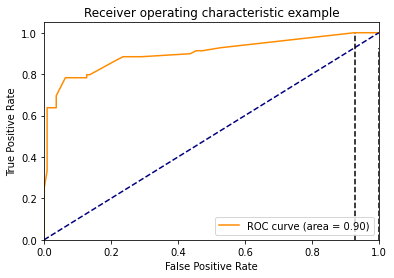

In [147]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange'
         , label='ROC curve (area = %0.2f)'%auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0,fpr[idx]],[tpr[idx],tpr[idx]],'k--')
plt.plot([fpr[idx],fpr[idx]],[0,tpr[idx]],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()